## FINAL PROJECT - Covid-19 World Vaccination Progress

Bria Woodard

**Overview** 

Analyze the global COVID-19 vaccination dataset to derive insights using data visualization and statistical techniques. Your task is to explore the dataset, clean the data, and answer specific questions through analysis and visualization. Provide interpretations for each result and general insights.

----

### Data Understanding and Cleaning

**Objective: Understand the dataset and clean it for analysis.**

1. **Understand the Dataset:**

- Display the first 10 rows of the dataset.
- Check for null values and describe the structure of the data (e.g., column types, unique values, range of dates).
Note: Before handling the missing values, copy the data frame into a new data frame for analysis.

2. **Handle Missing Values:**

- Identify columns with missing data.
- Use appropriate methods to handle missing values:
    - Forward-fill or backward-fill for time-series data.
    - Impute values with the mean, median, or a custom strategy where necessary.
    - Drop columns/rows only when unavoidable.
    - Explicitly highlight which approach was taken and why.

3. **Validate Data:**

- Check for duplicates and remove them if necessary.
- Convert columns like date to a proper datetime format.
- Ensure numeric columns (e.g., total_vaccinations, daily_vaccinations) are in a consistent format, free of outliers, and handle negative or zero values appropriately.

4. **Additional Cleaning Steps (if required):**

- Check for inconsistencies in text columns:
    - Example: Uniform capitalization in country names.
- Derive new columns for better analysis:
    - Example: Create a month column for monthly trends.
- Explicitly document any new cleaning performed.

**Note:** You can include additional cleaning if required and make sure to highlight those. Explicitly highlight which approach was taken and why.

In [149]:
#import packages
import pandas as pd
import numpy as np

In [150]:
#load dataset
df = pd.read_csv("/Users/briawoodard/Downloads/1_covid_vaccination.csv")

Understanding the dataset:

In [152]:
#display the first 10 rows of the dataset
df.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,40.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,45.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,50.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [153]:
#copy dataset into a new file
df_new= df.copy()

In [154]:
df_new.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,40.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,45.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,50.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


### **2. Handle Missing Values**

data cleaning attempt 1:

In [157]:
#identify missing values
df_new.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [158]:
# Time-series data: Forward-fill missing values
df['daily_vaccinations'].ffill()
df['daily_vaccinations_per_million'].ffill()

# Cumulative values: Forward-fill and then backward-fill (to handle leading/trailing nulls)
df['total_vaccinations'].ffill().bfill()
df['people_vaccinated'].ffill().bfill()
df['people_fully_vaccinated'].ffill().bfill()

0          55624.0
1          55624.0
2          55624.0
3          55624.0
4          55624.0
           ...    
86507    3473523.0
86508    3487962.0
86509    3493763.0
86510    3501493.0
86511    3510256.0
Name: people_fully_vaccinated, Length: 86512, dtype: float64

In [159]:
# Percentage columns: Impute missing values with the column median
df['total_vaccinations_per_hundred'].fillna(df['total_vaccinations_per_hundred'].median())
df['people_vaccinated_per_hundred'].fillna(df['people_vaccinated_per_hundred'].median())
df['people_fully_vaccinated_per_hundred'].fillna(df['people_fully_vaccinated_per_hundred'].median())

0        31.75
1        31.75
2        31.75
3        31.75
4        31.75
         ...  
86507    23.02
86508    23.11
86509    23.15
86510    23.20
86511    23.26
Name: people_fully_vaccinated_per_hundred, Length: 86512, dtype: float64

In [160]:
df_new = df.dropna(subset=['daily_vaccinations_raw', 'people_vaccinated', 'people_fully_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'])

dataset should be cleaned-> check that there are no null values

In [162]:
df_new.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

successful cleaning above!!!

In [164]:
df_cleaned = df_new.copy()

In [165]:
#save df_cleaned to a csv
df_cleaned.to_csv('/Users/briawoodard/Downloads/cleaned_covid_dataset.csv')

## 2. Global Trends Analysis

**Objective: Visualize and interpret global vaccination trends.**

**Question: Total Vaccinations Over Time**

- Plot the global total vaccinations over time (date vs. total vaccinations)
(You can select a particular year if needed for better quality of the graph).

**Question: Daily Vaccinations Trend**

- Plot the trend of daily vaccinations globally, ensuring x-axis labels are readable.

In [168]:
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt

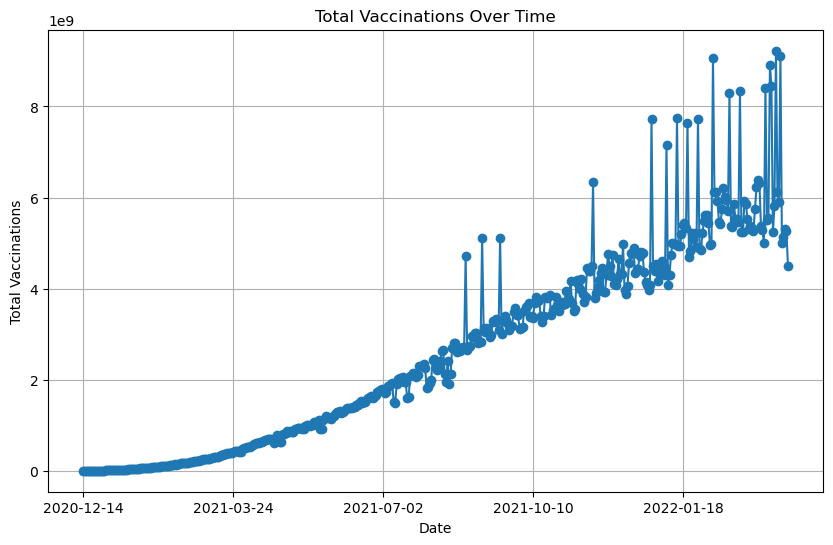

In [169]:
#plot total vaccinations over time
df_cleaned.groupby('date')['total_vaccinations'].sum().plot(kind='line', marker='o', title='Total Vaccinations Over Time', xlabel='Date', ylabel='Total Vaccinations', figsize=(10, 6), grid=True)
plt.show()

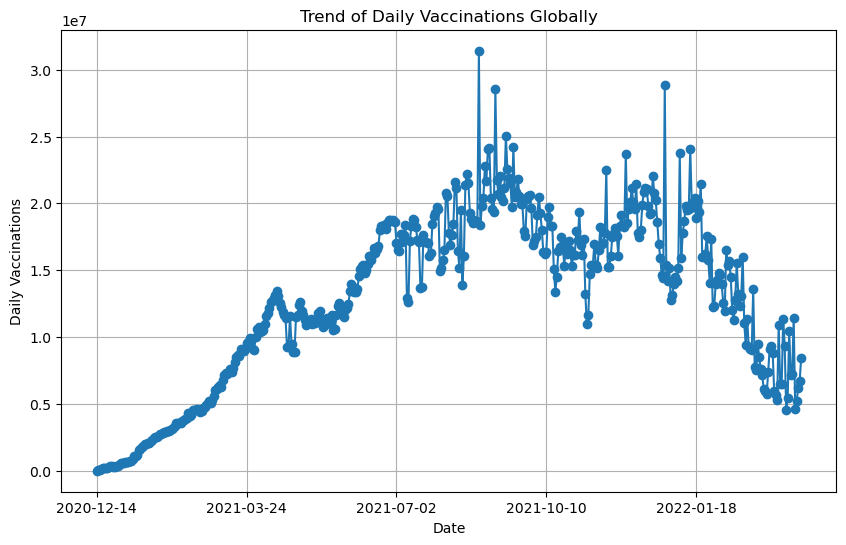

In [170]:
#plot daily vaccinations trend
df_cleaned.groupby('date')['daily_vaccinations'].sum().plot(kind='line', marker='o', title='Trend of Daily Vaccinations Globally', xlabel='Date', ylabel='Daily Vaccinations', figsize=(10, 6), grid=True)
plt.show()

---

## 3. Country-Level Analysis

**Objective: Focus on specific countries to analyze vaccination trends.**


**Question: Top 5 Countries by Total Vaccinations**

    - Identify the top 5 countries with the highest total vaccinations and plot their progress over time.
    
**Additional Cleaning:** Standardize country names or remove rows where country is missing.

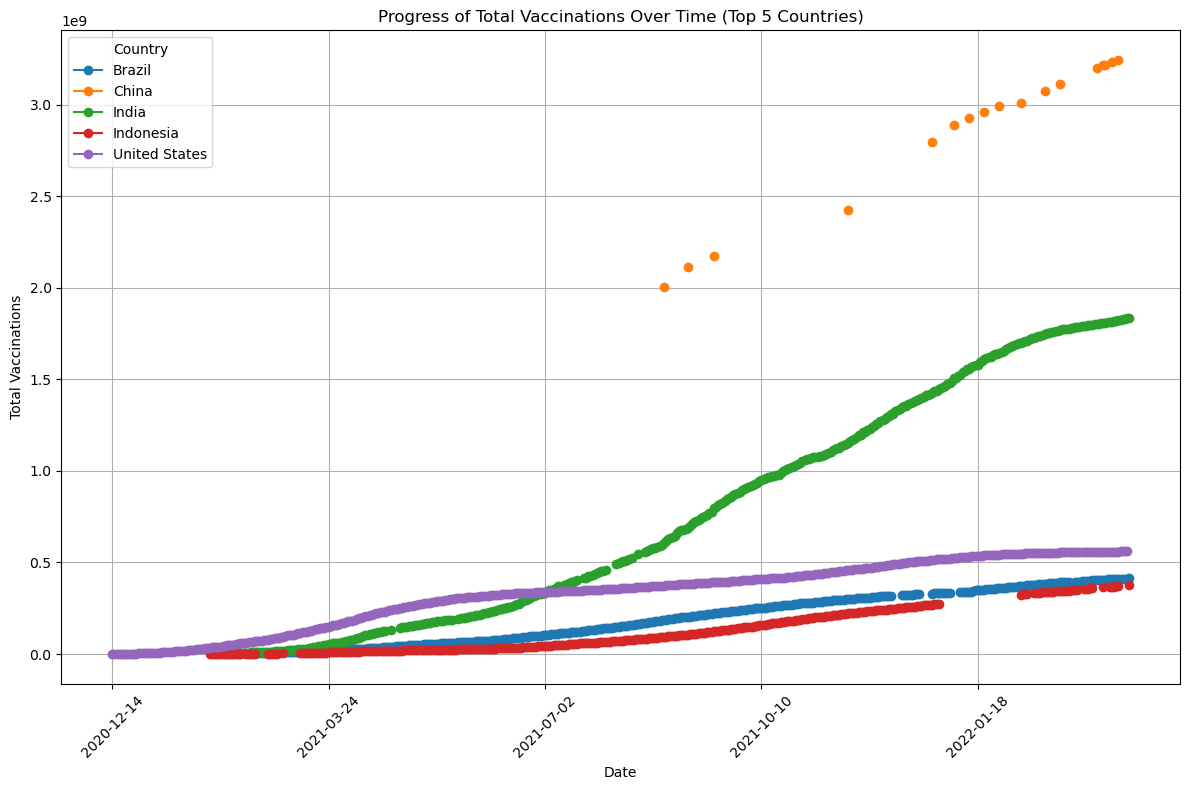

In [174]:
top_countries = df_cleaned.groupby('country')['total_vaccinations'].max().nlargest(5).index
df_cleaned[df_cleaned['country'].isin(top_countries)].pivot(index='date', columns='country', values='total_vaccinations').plot(figsize=(12, 8), title='Progress of Total Vaccinations Over Time (Top 5 Countries)', marker='o', xlabel='Date', ylabel='Total Vaccinations', grid=True)
plt.legend(title='Country', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---

## 4. Correlation and Heatmap Analysis

**Objective: Analyze correlations within the dataset.**

**Question: Correlation Heatmap**
- Create a heatmap showing correlations between numerical columns.

**Question: Insights from Correlation**

- Discuss the most and least correlated variables and their implications.

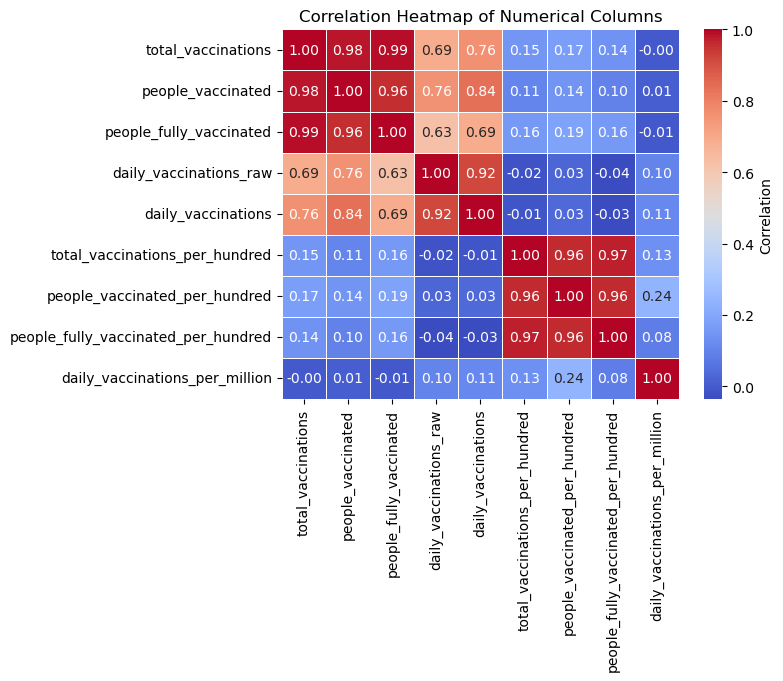

In [178]:
#correlation heatmap
correlation_matrix = df_cleaned.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation'}).set_title('Correlation Heatmap of Numerical Columns')
plt.show()

### Insights From Correlation:
People fully vaccinated and total vaccinations were very strongly correlated this could show that there as more people are vaccinated, total vaccinations increase.
Total vaccinations per hundreds and daily vaccinations were weakly correlated- this shows that changes in daily vaccinations does not neccessarily affect the vaccinations per hundred.

---

## 5. Vaccine-Type Analysis

**Objective: Explore the distribution of vaccines used globally.**
**Question: Countries Using Multiple Vaccines**
- Identify countries that use more than one vaccine and plot the count of vaccines used per country.

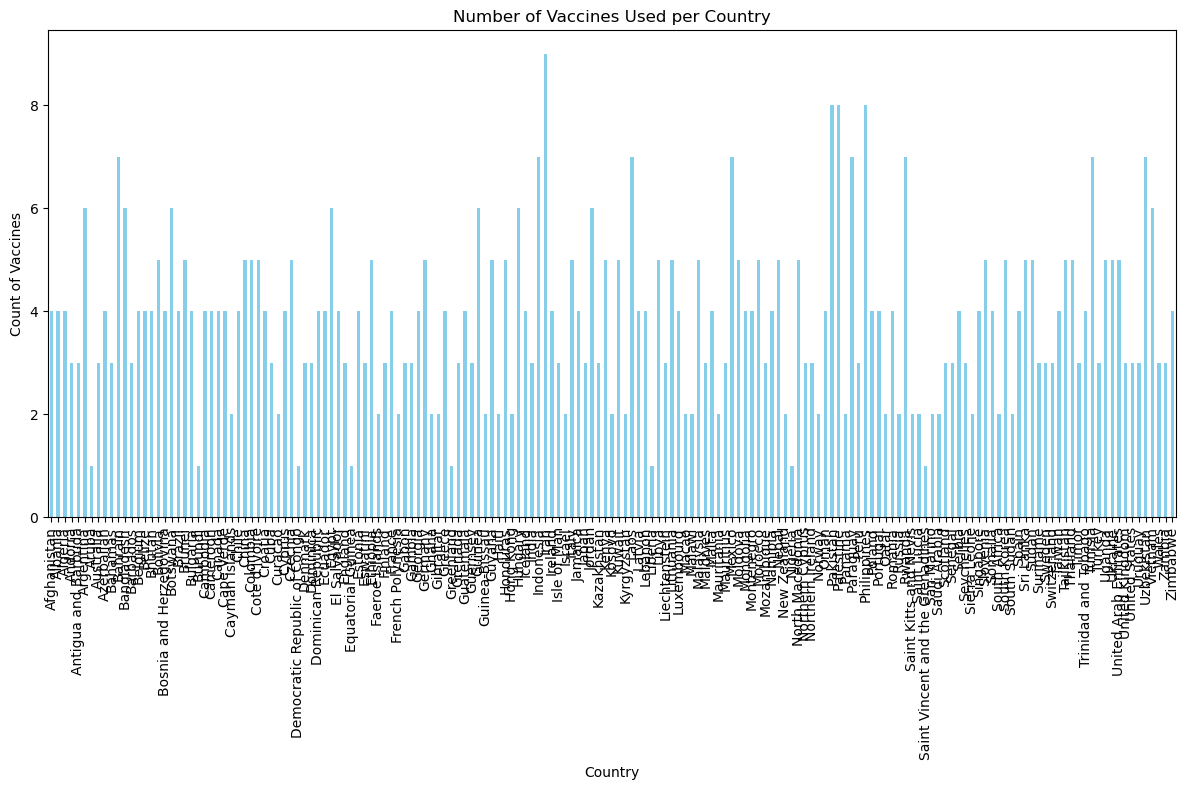

In [182]:
#plotting all countries 

# Step 1: Identify countries using more than one vaccine
df_cleaned['vaccine_count'] = df_cleaned['vaccines'].str.split(', ').apply(len)
countries_multiple_vaccines = df_cleaned[df_cleaned['vaccine_count'] > 1]['country'].unique()

# Step 2: Count the number of vaccines used per country
vaccine_counts = df_cleaned.groupby('country')['vaccine_count'].max()

# Step 3: Plot the data
vaccine_counts.plot(kind='bar', figsize=(12, 8), title='Number of Vaccines Used per Country', xlabel='Country', ylabel='Count of Vaccines', color='skyblue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

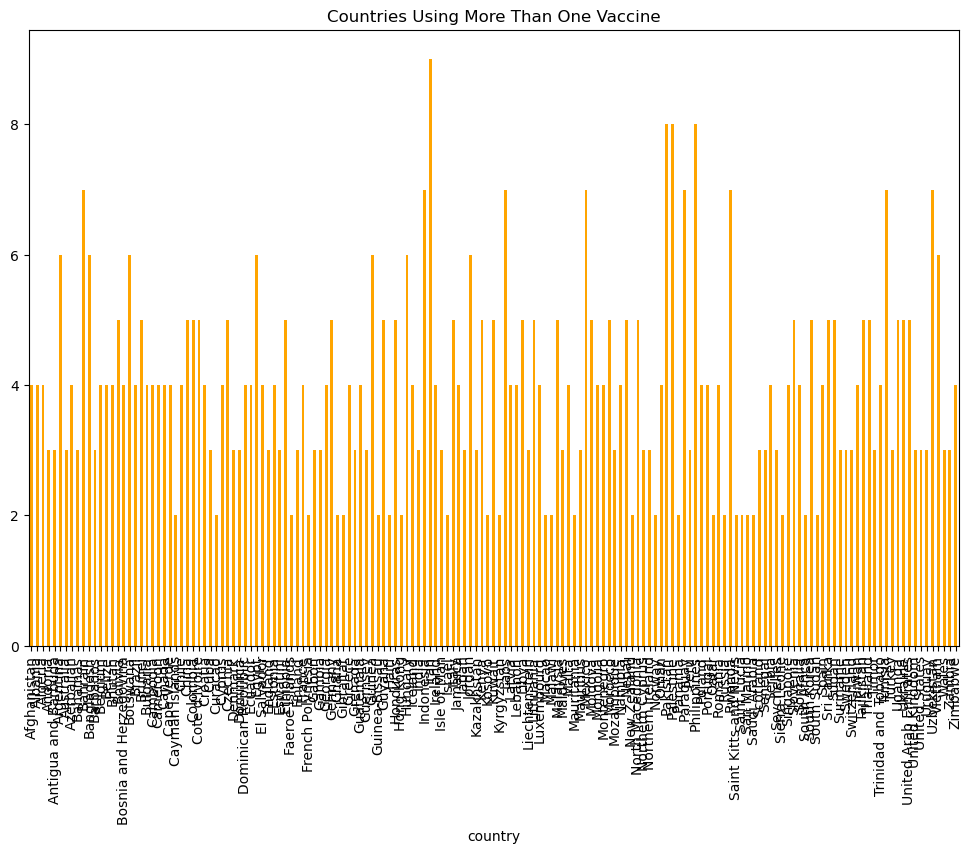

In [183]:
#countries exculsively with 2+ vaccines used
vaccine_counts[countries_multiple_vaccines].plot(kind='bar', figsize=(12, 8), color='orange', title='Countries Using More Than One Vaccine')
plt.show()

---

## 6. Daily Vaccinations Per Capita
**Question: Daily Vaccinations Per Capita**

Calculate daily vaccinations per capita for a few countries (use an estimated population if not available in the dataset).

In [186]:
#calculate the daily vaccinations

estimated_population = {
    'United States': 331000000,
    'India': 1393000000,
    'Brazil': 213000000,
    'China': 1419321278,
    'Indonesia': 284408236,
}

# Step 1: Map population estimates to the DataFrame
df_cleaned['population'] = df_cleaned['country'].map(estimated_population)

# Step 2: Handle missing population data
df_cleaned['population'] = df_cleaned['population'].fillna(1000000)  # I used a population estimate of 1,000,000.

# Step 3: Calculate daily vaccinations per capita
df_cleaned['daily_vaccinations_per_capita'] = df_cleaned['daily_vaccinations'] / df_cleaned['population']

# Step 4: Filter for countries and show the results
selected_countries = ['United States', 'India', 'Brazil', 'China', 'Indonesia']
df_selected = df_cleaned[df_cleaned['country'].isin(selected_countries)][['country', 'date', 'daily_vaccinations', 'daily_vaccinations_per_capita']]

# Display the calculated data
print(df_selected.head())  

      country        date  daily_vaccinations  daily_vaccinations_per_capita
10668  Brazil  2021-02-05            211081.0                       0.000991
10669  Brazil  2021-02-06            215308.0                       0.001011
10670  Brazil  2021-02-07            217346.0                       0.001020
10671  Brazil  2021-02-08            218237.0                       0.001025
10672  Brazil  2021-02-09            228375.0                       0.001072


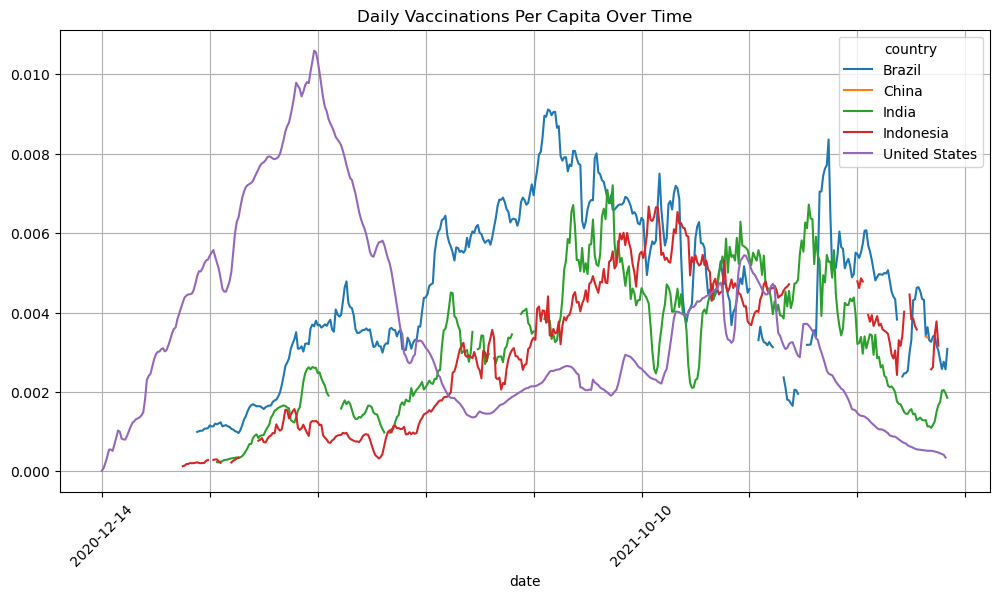

In [187]:
#plot vaccinatins per capita over time
df_selected.pivot(index='date', columns='country', values='daily_vaccinations_per_capita').plot(figsize=(12, 6), grid=True, title='Daily Vaccinations Per Capita Over Time').xaxis.set_major_locator(plt.MultipleLocator(60))
plt.xticks(rotation=45)
plt.show()

**Question: Comparison of People Vaccinated vs Fully Vaccinated**
- Create a bar plot comparing people_vaccinated and people_fully_vaccinated for these top 5 countries.

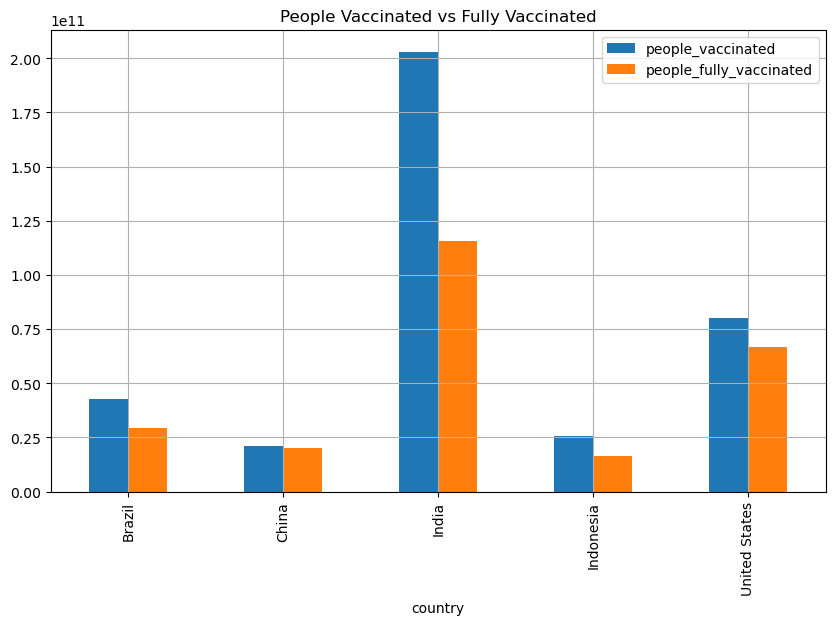

In [189]:
df_cleaned[df_cleaned['country'].isin(['United States', 'India', 'Brazil', 'China', 'Indonesia'])].groupby('country')[['people_vaccinated', 'people_fully_vaccinated']].sum().plot(kind='bar', figsize=(10, 6), title='People Vaccinated vs Fully Vaccinated', grid=True)
plt.show()

---

## 7. Insights and Generalizations

## **Insights and Conclusion** 

**Global Vaccination Trends** 
- Global Vaccination increased over time
- Wealthier countries had more vaccinated people while poorer countries had less vaccinated individuals.

**Vaccinations Per Capita**
- There were more vaccinations per capita in developed countries. However, China had moderate vaccines per capita.
- Disparities in vaccinations were very apparent.

**Country-Specific Observations**
- Some countries used different tyeps of vaccines.

Overall, vaccination disparities were very prevalent. Wealthier, more developed countries had more people vaccinated overall and/or more vaccinations per capita. Less developed countries had less vaccines. I would be intrigued to see not only the number of vaccines but the amount and prevalence of Covid infection worldwide. This way, I could see trends in how vaccines were effective. As Covid-19 was a recent pandemic that affect the world's way of life, this data is important as Covid vaccinations saved lives.